In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import plotly.express as px
import seaborn as sns
from sklearn import datasets

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/shekharbiswas/MHC/main/mental-heath-in-tech-2016_20161114.csv')

# MHC : mental health condition


df = df.rename(columns={'What is your gender?': 'Gender',
                        'What is your age?': 'Age',
                        'What country do you live in?': 'Country',
                        'What US state or territory do you live in?': 'US_state_live',
                        'Do you work remotely?': 'Remote',
                        'What US state or territory do you work in?': 'US_state_work',
                        'Which of the following best describes your work position?' : 'work_pos',
                        'Have you been diagnosed with a mental health condition by a medical professional?' : 'Diagnosed_mhc_by_medical_professional',
                        'Are you self-employed?' : 'self-employed',
                        "Does your employer provide mental health benefits as part of healthcare coverage?" : "healthcare_coverage"
                        })


df

,self-employed,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,healthcare_coverage,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",Age,Gender,Country,US_state_live,What country do you work in?,US_state_work,work_pos,Remote
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,Jun-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,Jun-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,Jun-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Not applicable to me,Not applicable to me,34,Female,United States of America,New York,United States of America,New York,Other,Sometimes
1429,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Often,56,MALE,United States of America,California,Afghanistan,NaN,Support,Sometimes
1430,0,100-500,1.0,NaN,Yes,Yes,Yes,Yes,I don't know,Somewhat difficult,...,Rarely,Sometimes,52,Male,United States of America,Georgia,United States of America,Georgia,Back-end Developer,Sometimes
1431,0,100-500,0.0,1.0,I don't know,I am not sure,No,Yes,I don't know,Somewhat difficult,...,Sometimes,Often,30,Female,United States of America,Nebraska,United States of America,Nebraska,DevOps/SysAdmin,Sometimes


In [ ]:
#df.dropna()

In [ ]:
df.dtypes.index

Index(['self-employed',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'healthcare_coverage',
       'Do you know the options for mental health care available under your employer-provided coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
       'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
       'Do you think that discussing a mental health disorder with your employer would have negative

In [ ]:
# get all numeric columns
bools = []
col_num = []

for i, type in enumerate(df.dtypes):
    if type != 'object':
        bools.append(True)
        col_num.append(i)

    else:
        bools.append(False)
col_num = list(df.dtypes[col_num].index)
col_num

['self-employed',
 'Is your employer primarily a tech company/organization?',
 'Is your primary role within your company related to tech/IT?',
 'Do you have medical coverage (private insurance or state-provided) which includes treatment of \xa0mental health issues?',
 'Do you have previous employers?',
 'Have you ever sought treatment for a mental health issue from a mental health professional?',
 'Age']

In [ ]:
df.isna().sum()

self-employed                                                      0
How many employees does your company or organization have?       287
Is your employer primarily a tech company/organization?          287
Is your primary role within your company related to tech/IT?    1170
healthcare_coverage                                              287
                                                                ... 
US_state_live                                                    593
What country do you work in?                                       0
US_state_work                                                    582
work_pos                                                           0
Remote                                                             0
Length: 63, dtype: int64

In [ ]:
df.head(4)

,self-employed,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,healthcare_coverage,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",Age,Gender,Country,US_state_live,What country do you work in?,US_state_work,work_pos,Remote
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,Jun-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,Jun-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes


In [ ]:
df.dtypes

self-employed                                                     int64
How many employees does your company or organization have?       object
Is your employer primarily a tech company/organization?         float64
Is your primary role within your company related to tech/IT?    float64
healthcare_coverage                                              object
                                                                 ...   
US_state_live                                                    object
What country do you work in?                                     object
US_state_work                                                    object
work_pos                                                         object
Remote                                                           object
Length: 63, dtype: object

<Axes: >

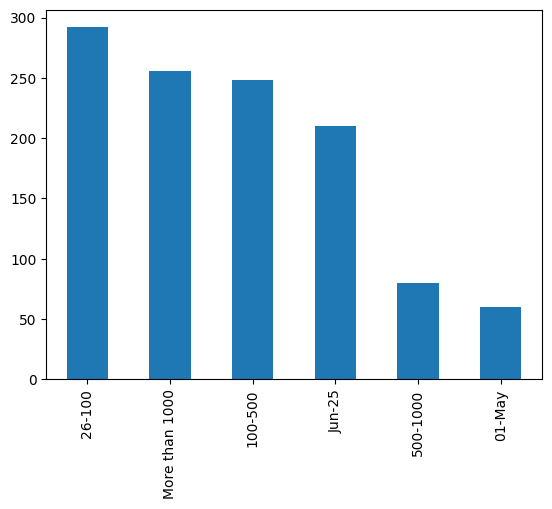

In [ ]:
df['How many employees does your company or organization have?'].value_counts().plot(kind = 'bar')

In [ ]:
df_num = df[col_num]
df_num

,self-employed,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you have previous employers?,Have you ever sought treatment for a mental health issue from a mental health professional?,Age
0,0,1.0,NaN,NaN,1,0,39
1,0,1.0,NaN,NaN,1,1,29
2,0,1.0,NaN,NaN,1,1,38
3,1,NaN,NaN,1.0,1,1,43
4,0,0.0,1.0,NaN,1,1,43
...,...,...,...,...,...,...,...
1428,1,NaN,NaN,1.0,1,1,34
1429,1,NaN,NaN,1.0,0,0,56
1430,0,1.0,NaN,NaN,1,1,52
1431,0,0.0,1.0,NaN,1,0,30


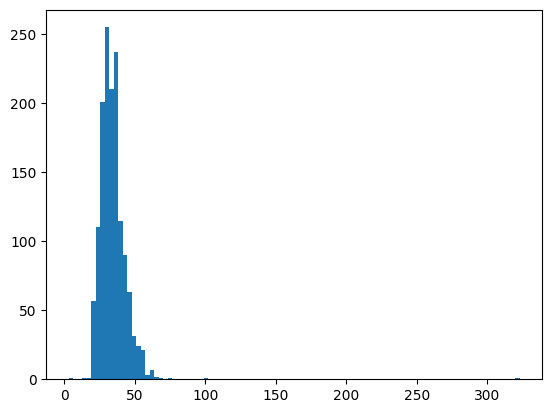

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df_num['Age'], bins = 100);


In [ ]:
df_num[df_num['Age'] >= 100]

,self-employed,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you have previous employers?,Have you ever sought treatment for a mental health issue from a mental health professional?,Age
564,0,1.0,NaN,NaN,1,0,323


In [ ]:
df[df['Age'] > 85]

,self-employed,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,healthcare_coverage,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",Age,Gender,Country,US_state_live,What country do you work in?,US_state_work,work_pos,Remote
372,0,Jun-25,1.0,NaN,Yes,No,No,I don't know,Yes,Somewhat easy,...,Rarely,Often,99,Other,United States of America,Michigan,United States of America,Michigan,Supervisor/Team Lead,Sometimes
564,0,100-500,1.0,NaN,Yes,No,I don't know,I don't know,I don't know,I don't know,...,Not applicable to me,Not applicable to me,323,Male,United States of America,Oregon,United States of America,Oregon,Back-end Developer,Sometimes


In [ ]:
df_num.describe()

,self-employed,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you have previous employers?,Have you ever sought treatment for a mental health issue from a mental health professional?,Age
count,1433.000000,1146.000000,263.000000,287.000000,1433.000000,1433.000000,1433.000000
mean,0.200279,0.770506,0.942966,0.644599,0.882066,0.585485,34.286113
std,0.400349,0.420691,0.232350,0.479471,0.322643,0.492810,11.290931
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,28.000000
50%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,33.000000
75%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,39.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,323.000000


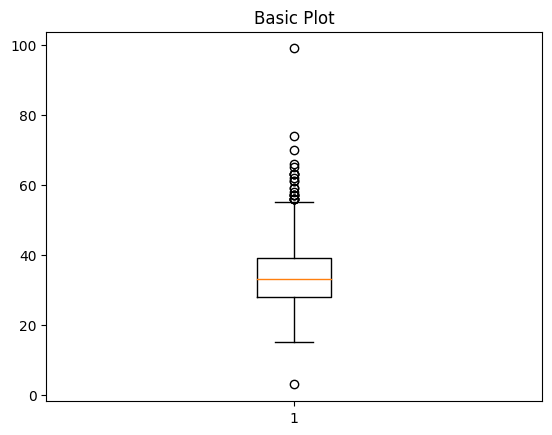

In [ ]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(df_num[df_num['Age'] <= 100] ['Age']);

In [ ]:
# Check summary statistics for numerical features
df.describe()

,self-employed,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you have previous employers?,Have you ever sought treatment for a mental health issue from a mental health professional?,Age
count,1433.000000,1146.000000,263.000000,287.000000,1433.000000,1433.000000,1433.000000
mean,0.200279,0.770506,0.942966,0.644599,0.882066,0.585485,34.286113
std,0.400349,0.420691,0.232350,0.479471,0.322643,0.492810,11.290931
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,28.000000
50%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,33.000000
75%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,39.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,323.000000


In [ ]:
# Explore other columns and their unique values
for column in df.columns:
    print(f"{column}: {df[column].unique()}")

self-employed: [0 1]
How many employees does your company or organization have?: ['26-100' 'Jun-25' nan 'More than 1000' '100-500' '500-1000' '01-May']
Is your employer primarily a tech company/organization?: [ 1. nan  0.]
Is your primary role within your company related to tech/IT?: [nan  1.  0.]
healthcare_coverage: ['Not eligible for coverage / N/A' 'No' nan 'Yes' "I don't know"]
Do you know the options for mental health care available under your employer-provided coverage?: [nan 'Yes' 'I am not sure' 'No']
Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?: ['No' 'Yes' nan "I don't know"]
Does your employer offer resources to learn more about mental health concerns and options for seeking help?: ['No' 'Yes' nan "I don't know"]
Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?: ["I don't know" 'Yes' nan 'No']

In [ ]:
# Handle non-standardized textual inputs - encode text data using techniques like Label Encoding or One-Hot Encoding
# Example using Label Encoding:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
# Check column names
print(df.columns)

Index(['self-employed',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'healthcare_coverage',
       'Do you know the options for mental health care available under your employer-provided coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
       'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
       'Do you think that discussing a mental health disorder with your employer would have negative

In [ ]:
df_num['self-employed'].value_counts()

0    1146
1     287
Name: self-employed, dtype: int64

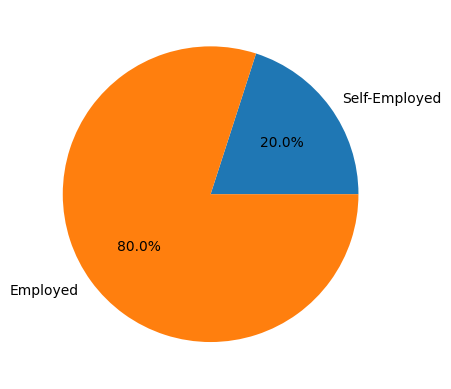

In [ ]:
labels = 'Self-Employed', 'Employed'
sizes = [287, 1146]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%');

In [ ]:
df_num

,self-employed,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you have previous employers?,Have you ever sought treatment for a mental health issue from a mental health professional?,Age
0,0,1.0,NaN,NaN,1,0,39
1,0,1.0,NaN,NaN,1,1,29
2,0,1.0,NaN,NaN,1,1,38
3,1,NaN,NaN,1.0,1,1,43
4,0,0.0,1.0,NaN,1,1,43
...,...,...,...,...,...,...,...
1428,1,NaN,NaN,1.0,1,1,34
1429,1,NaN,NaN,1.0,0,0,56
1430,0,1.0,NaN,NaN,1,1,52
1431,0,0.0,1.0,NaN,1,0,30


In [ ]:
df_num['Is your employer primarily a tech company/organization?'].value_counts()

1.0    883
0.0    263
Name: Is your employer primarily a tech company/organization?, dtype: int64

In [ ]:
df_num.loc[df_num['Is your employer primarily a tech company/organization?'] == 1,'self-employed'].value_counts()

# There is no self-employed person working for tech

0    883
Name: self-employed, dtype: int64

In [ ]:
df_num.loc[df_num['Is your employer primarily a tech company/organization?'] == 0, 'self-employed'].value_counts()

0    263
Name: self-employed, dtype: int64

In [ ]:
883 + 263

1146

In [ ]:
df_num[df_num['self-employed']== 1]

# Self employed people did not respond to Q:

,self-employed,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you have previous employers?,Have you ever sought treatment for a mental health issue from a mental health professional?,Age
3,1,NaN,NaN,1.0,1,1,43
9,1,NaN,NaN,1.0,1,1,30
18,1,NaN,NaN,1.0,0,1,25
24,1,NaN,NaN,1.0,1,0,38
33,1,NaN,NaN,0.0,1,0,37
...,...,...,...,...,...,...,...
1404,1,NaN,NaN,0.0,1,1,29
1408,1,NaN,NaN,1.0,1,0,34
1420,1,NaN,NaN,1.0,1,0,29
1428,1,NaN,NaN,1.0,1,1,34


In [ ]:
# 1. Check for all numeric data

# 2. Create a function to know which columns are object

# 3. Check for non-Numeric ( Strings / Object )

In [ ]:
df_num

,self-employed,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you have previous employers?,Have you ever sought treatment for a mental health issue from a mental health professional?,Age
0,0,1.0,NaN,NaN,1,0,39
1,0,1.0,NaN,NaN,1,1,29
2,0,1.0,NaN,NaN,1,1,38
3,1,NaN,NaN,1.0,1,1,43
4,0,0.0,1.0,NaN,1,1,43
...,...,...,...,...,...,...,...
1428,1,NaN,NaN,1.0,1,1,34
1429,1,NaN,NaN,1.0,0,0,56
1430,0,1.0,NaN,NaN,1,1,52
1431,0,0.0,1.0,NaN,1,0,30


In [ ]:
df.shape

(1433, 63)

In [ ]:
cols = df.columns

In [ ]:
df

,self-employed,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,healthcare_coverage,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",Age,Gender,Country,US_state_live,What country do you work in?,US_state_work,work_pos,Remote
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,Jun-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,Jun-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,Jun-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Not applicable to me,Not applicable to me,34,Female,United States of America,New York,United States of America,New York,Other,Sometimes
1429,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Often,56,MALE,United States of America,California,Afghanistan,NaN,Support,Sometimes
1430,0,100-500,1.0,NaN,Yes,Yes,Yes,Yes,I don't know,Somewhat difficult,...,Rarely,Sometimes,52,Male,United States of America,Georgia,United States of America,Georgia,Back-end Developer,Sometimes
1431,0,100-500,0.0,1.0,I don't know,I am not sure,No,Yes,I don't know,Somewhat difficult,...,Sometimes,Often,30,Female,United States of America,Nebraska,United States of America,Nebraska,DevOps/SysAdmin,Sometimes


In [ ]:
df_52 = df['US_state_work'].value_counts().reset_index()
df_52.head(2)

,index,US_state_work
0,California,141
1,Illinois,58


In [ ]:
df_52.columns = ['US_state_work', 'count']

import plotly.express as px

fig = px.bar(df_52, x='US_state_work', y='count')
fig.show()

In [ ]:
df_52.head(2)

,US_state_work,count
0,California,141
1,Illinois,58


In [ ]:
df.columns[['mental' in c for c in df.columns]]

Index(['Do you know the options for mental health care available under your employer-provided coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
       'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
       'Do you think that discussing a mental health disorder with your employer would have negative consequences?',
       'Would you feel comfortable discussing a mental health disorder with your coworkers?',
       'Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?',
       'Do you feel that your employer takes

In [ ]:
df.columns

Index(['self-employed',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'healthcare_coverage',
       'Do you know the options for mental health care available under your employer-provided coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
       'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
       'Do you think that discussing a mental health disorder with your employer would have negative

In [ ]:
df['healthcare_coverage'].value_counts()

Yes                                531
I don't know                       319
No                                 213
Not eligible for coverage / N/A     83
Name: healthcare_coverage, dtype: int64

In [ ]:
df_x = df.loc[df['US_state_work'].isin(['California', 'Illinois', 'New York']), ['healthcare_coverage', 'US_state_work']]

df_x.columns =['employer_provide_mh_benefits', 'state']
df_x

,employer_provide_mh_benefits,state
1,No,Illinois
4,Yes,Illinois
8,I don't know,California
19,I don't know,New York
20,No,New York
...,...,...
1399,Yes,California
1411,Yes,New York
1414,Yes,New York
1427,Yes,Illinois


In [ ]:
df.columns

Index(['self-employed',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'healthcare_coverage',
       'Do you know the options for mental health care available under your employer-provided coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
       'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
       'Do you think that discussing a mental health disorder with your employer would have negative

In [ ]:
dfi =df.groupby('US_state_work')['healthcare_coverage'].value_counts().reset_index(name = 'count')
dfi

,US_state_work,healthcare_coverage,count
0,Alabama,Yes,3
1,Alabama,I don't know,1
2,Alaska,Yes,2
3,Arizona,No,2
4,Arizona,Yes,2
...,...,...,...
121,West Virginia,Yes,1
122,Wisconsin,Yes,6
123,Wisconsin,I don't know,1
124,Wisconsin,No,1


In [ ]:
# state wise healthcare coverage by employer

#dfi = df.groupby('US_state_work')['healthcare_coverage'].value_counts().reset_index()
df1j = dfi.groupby('US_state_work')['count'].sum().reset_index()

dfi = dfi.loc[dfi['healthcare_coverage'] == 'Yes', :]

dfi = dfi.merge(df1j, on = 'US_state_work')

dfi['perct'] = round((dfi['count_x'] / dfi['count_y'])*100)
dfi = dfi.sort_values(by = 'perct', ascending= False)
dfi.head(10)

,US_state_work,healthcare_coverage,count_x,count_y,perct
10,Hawaii,Yes,1,1,100.0
43,West Virginia,Yes,1,1,100.0
27,New Mexico,Yes,1,1,100.0
23,Montana,Yes,1,1,100.0
1,Alaska,Yes,2,2,100.0
6,Delaware,Yes,1,1,100.0
16,Kentucky,Yes,2,2,100.0
22,Missouri,Yes,8,9,89.0
0,Alabama,Yes,3,4,75.0
20,Michigan,Yes,31,42,74.0


In [ ]:
fig = px.bar(dfi, x='US_state_work', y='perct')
fig.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7b7c230efa60>,
 'caps': [<matplotlib.lines.Line2D at 0x7b7c230ee1a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b7c230ef010>],
 'medians': [<matplotlib.lines.Line2D at 0x7b7c230ef940>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b7c230ec9a0>],
 'means': []}

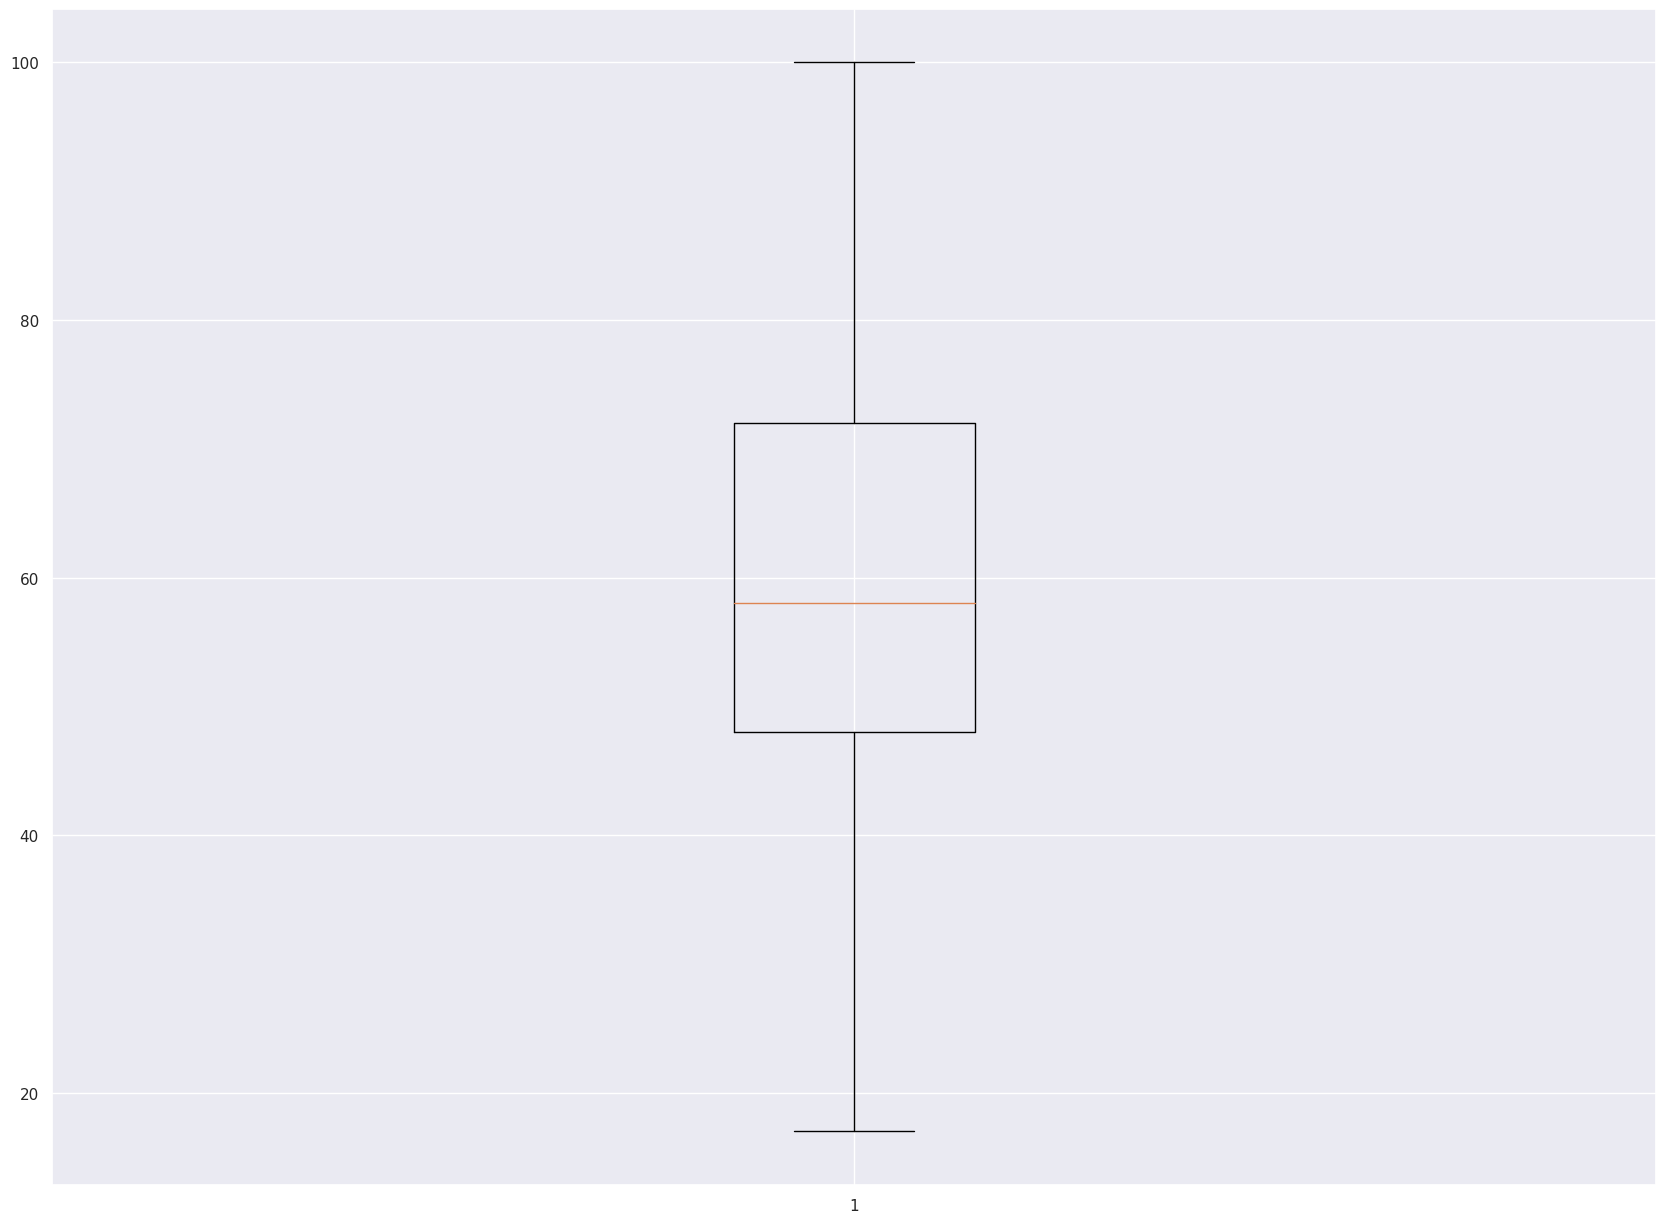

In [ ]:
plt.boxplot(dfi['perct'])

In [ ]:
dfi['perct'].median()

58.0

In [ ]:
dfi.reset_index(drop = True)

,US_state_work,healthcare_coverage,count_x,count_y,perct
0,Hawaii,Yes,1,1,100.0
1,West Virginia,Yes,1,1,100.0
2,New Mexico,Yes,1,1,100.0
3,Montana,Yes,1,1,100.0
4,Alaska,Yes,2,2,100.0
5,Delaware,Yes,1,1,100.0
6,Kentucky,Yes,2,2,100.0
7,Missouri,Yes,8,9,89.0
8,Alabama,Yes,3,4,75.0
9,Michigan,Yes,31,42,74.0


In [ ]:
import plotly.express as px

fig = px.choropleth(locations=["CA", "TX", "NY", "NM","HI","AK", "AL", "AR", "CO", "CT", "DE", "DC", "FL", "GA", "ID", "IL", "IN", "IA", "KS", "KY",  "ME", "MD", "MA",
                               "MI", "MN", "MO", "MT", "NE", "NH", "NJ", "NC", "ND" ,"OH", "OK", "OR", "PA", "RI", "SD","TN", "UT", "VT","VA","WA","WV","WI", "NV", "WY", "LA", "MS", "SC", "AZ"], locationmode="USA-states", color=[70,58,58, 100, 100, 100, 40, 38, 33, 100, 50, 62, 45, 50, 54, 55, 60, 43, 100, 50, 73, 67, 74, 58, 89, 100, 60, 33, 17, 60, 33,
                                                                                                                                                                                                 70, 38, 48, 72, 50, 67, 61, 50, 33, 31, 58, 100, 67, 80, 58, 58, 58, 58, 58, 58], scope="usa")
fig.show()

#nevada, wyoming, louisiana, missisippi, south carolina, (arizona)

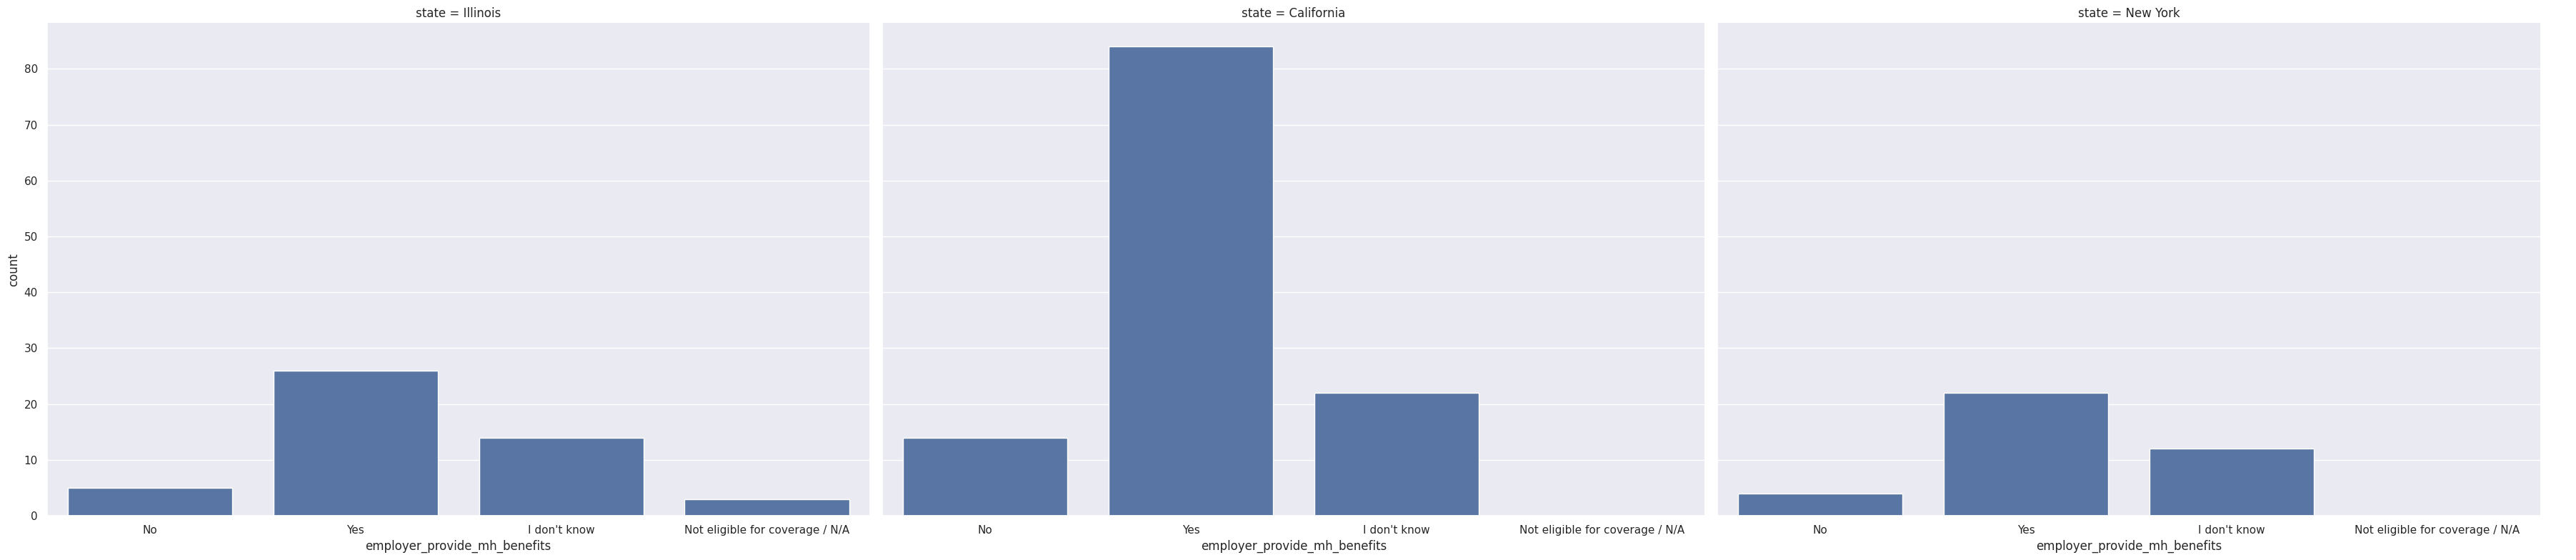

In [ ]:
import seaborn as sns

sns.set(rc={'figure.figsize':(20.7,15.27)})

sns.catplot(
    data=df_x, x="employer_provide_mh_benefits", col="state",
    kind="count", height=8, aspect=1.5,
)

**Do you currently have a mental health disorder?**

In [ ]:
df.columns

Index(['self-employed',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'healthcare_coverage',
       'Do you know the options for mental health care available under your employer-provided coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
       'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
       'Do you think that discussing a mental health disorder with your employer would have negative

In [ ]:
df_48 = df['Do you currently have a mental health disorder?'].value_counts().reset_index()

df_48.columns = ['Answer', 'Count_Mental_Disorder']

In [ ]:
fig = px.pie(df_48, values='Count_Mental_Disorder', names='Answer', title='Do you have Mental Disorder ?')
fig.show()


In [ ]:
df1 = df.copy()

#Create separate columns for presence of each MHC for easier filter
df1['Anxiety Disorder'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('Anxiety Disorder')
df1['Mood Disorder'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('Mood Disorder')
df1['ADHD'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('Attention')
df1['OCD'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('Compulsive')
df1['PTSD'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('Post')
df1['PTSD undiagnosed'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('PTSD \(undiagnosed\)')
df1['Eating Disorder'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('Eating')
df1['Substance Use Disorder'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('Substance')
df1['Stress Response Syndrome'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('Stress Response')
df1['Personality Disorder'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('Personality Disorder')
df1['Pervasive Developmental Disorder'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('Pervasive')
df1['Psychotic Disorder'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('Psychotic')
df1['Addictive Disorder'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('Addictive Disorder')
df1['Dissociative Disorder'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('Dissociative')
df1['Seasonal Affective Disorder'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('Seasonal')
df1['Schizotypal Personality Disorder'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('Schizotypal')
df1['Traumatic Brain Injury'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('Brain')
df1['Sexual Addiction'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('Sexual')
df1['Autism'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('Autism')
df1['ADD w/o Hyperactivity)'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('ADD \(w/o Hyperactivity\)')



In [ ]:
df1[['Anxiety Disorder', 'Mood Disorder' ]]

,Anxiety Disorder,Mood Disorder
0,NaN,NaN
1,True,True
2,NaN,NaN
3,True,True
4,True,False
...,...,...
1428,NaN,NaN
1429,NaN,NaN
1430,NaN,NaN
1431,True,True


In [ ]:
df1['Sexual Addiction'].value_counts()

False    567
True       1
Name: Sexual Addiction, dtype: int64

In [ ]:
#create dfs to 4 population types, no mental conditions, at least both anxiety & depression,
#at least ADHD, and at least OCD
df_no_MHD = df1.loc[(df1['Do you currently have a mental health disorder?'] == 'No')]
df_anx_dep = df1.loc[(df1['Anxiety Disorder'] == 1) & (df1['Mood Disorder'] == 1)]
df_adhd = df1.loc[(df1['ADHD'] == 1)]
df_ocd = df1.loc[(df1['OCD'] == 1)]
df_ptsd = df1.loc[(df1['PTSD'] == 1)]

In [ ]:
df_anx_dep

,self-employed,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,healthcare_coverage,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,Pervasive Developmental Disorder,Psychotic Disorder,Addictive Disorder,Dissociative Disorder,Seasonal Affective Disorder,Schizotypal Personality Disorder,Traumatic Brain Injury,Sexual Addiction,Autism,ADD w/o Hyperactivity)
1,0,Jun-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,False,False,False,False,False,False,False,False,False,False
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
9,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
16,0,26-100,1.0,NaN,Not eligible for coverage / N/A,No,No,No,I don't know,Very difficult,...,False,False,False,False,False,False,False,False,False,False
19,0,100-500,0.0,1.0,I don't know,No,No,No,I don't know,I don't know,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,0,100-500,0.0,1.0,Yes,Yes,No,I don't know,Yes,Somewhat easy,...,False,False,False,False,False,False,False,False,False,False
1415,0,More than 1000,0.0,1.0,Not eligible for coverage / N/A,I am not sure,No,I don't know,I don't know,Very difficult,...,False,False,False,False,False,False,False,False,False,False
1427,0,500-1000,1.0,NaN,Yes,No,No,No,Yes,Somewhat easy,...,False,False,False,False,False,False,False,False,False,False
1431,0,100-500,0.0,1.0,I don't know,I am not sure,No,Yes,I don't know,Somewhat difficult,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
#Display population size of each group
df_group = ['Total Population', 'No MHC', 'Anxiety & Depression', 'ADHD', 'PTSD', 'OCD']
df_group_values = [len(df1), len(df_no_MHD), len(df_anx_dep),
                   len(df_adhd), len(df_ptsd), len(df_ocd)]

df_MHD_count = pd.DataFrame(columns = ['Population', 'Count'])
df_MHD_count['Population'] = df_group
df_MHD_count['Count'] = df_group_values
df_MHD_count

,Population,Count
0,Total Population,1433
1,No MHC,531
2,Anxiety & Depression,253
3,ADHD,121
4,PTSD,69
5,OCD,45


Text(2, 1.15, 'Common MHCs in the Tech Workplace')

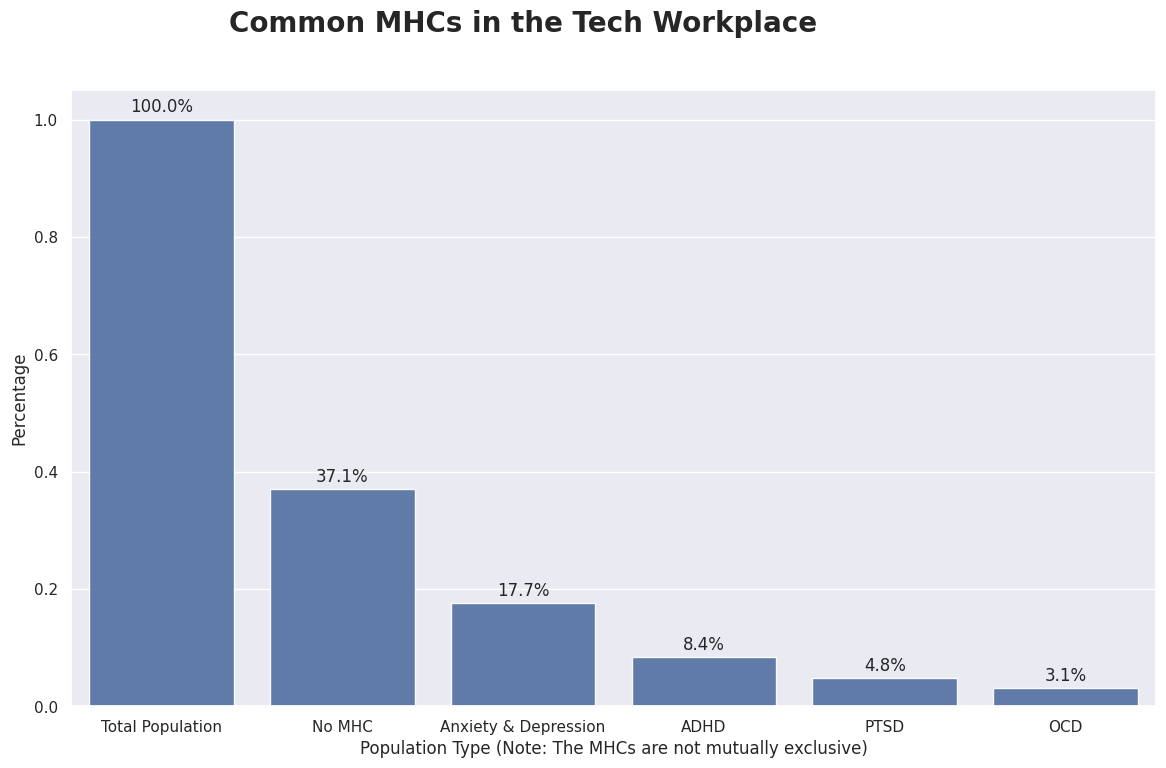

In [ ]:
#Display proportions of each group
df_group = ['Total Population', 'No MHC', 'Anxiety & Depression', 'ADHD','PTSD', 'OCD']
df_group_values = [len(df1)/len(df1), len(df_no_MHD)/len(df1), len(df_anx_dep)/len(df1),
                   len(df_adhd)/len(df1),len(df_ptsd)/len(df1), len(df_ocd)/len(df1)]

#bar plot creation
sns.set(style="darkgrid")
plt.figure(figsize=(14, 8))

ax1 = sns.barplot(x = df_group, y = df_group_values,alpha =.95)
ax1.set(xlabel = 'Population Type (Note: The MHCs are not mutually exclusive)')
ax1.set(ylabel = 'Percentage')

# annotate bar plots
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.1%'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

plt.text(2, 1.15, 'Common MHCs in the Tech Workplace',weight='bold',
         horizontalalignment='center',fontsize=20)

In [ ]:
df['Remote']

0       Sometimes
1           Never
2          Always
3       Sometimes
4       Sometimes
          ...    
1428    Sometimes
1429    Sometimes
1430    Sometimes
1431    Sometimes
1432    Sometimes
Name: Remote, Length: 1433, dtype: object

In [ ]:

df1 = df1.rename(columns={'What is your gender?': 'Gender',
                        'What is your age?': 'Age',
                        'What country do you live in?': 'Country',
                        'What US state or territory do you live in?': 'US_state_live',
                        'Do you work remotely?': 'Remote',
                        'What US state or territory do you work in?': 'US_state_work',
                        'Which of the following best describes your work position?' : 'work_pos',
                        'Have you been diagnosed with a mental health condition by a medical professional?' : 'Diagnosed_mhc_by_medical_professional',
                        'Are you self-employed?' : 'self-employed',
                        "Does your employer provide mental health benefits as part of healthcare coverage?" : "healthcare_coverage"
                        })

In [ ]:
df1['Gender'].value_counts().reset_index()

,index,Gender
0,Male,610
1,male,249
2,Female,153
3,female,95
4,M,86
...,...,...
65,cis male,1
66,Human,1
67,Genderfluid,1
68,Enby,1


In [ ]:
# Top MHC Disorders

import re

def retun_clean_data(str1):
    try:
        clean = re.sub('[^a-zA-Z0-9]', '', str1)

    except:
        clean = str1

    return clean


df1['Gender'] = df1['Gender'].apply(lambda x: retun_clean_data(x))



df_no_MHD = df1.loc[(df1['Do you currently have a mental health disorder?'] == 'No')]
df_anx_dep = df1.loc[(df1['Anxiety Disorder'] == 1) & (df1['Mood Disorder'] == 1)]
df_adhd = df1.loc[(df1['ADHD'] == 1)]
df_ocd = df1.loc[(df1['OCD'] == 1)]
df_ptsd = df1.loc[(df1['PTSD'] == 1)]


In [ ]:
#df_no_MHD['Gender'] = df_no_MHD['Gender'].str.strip()
df_no_MHD['Gender'].value_counts()

Male                     235
male                     103
M                         45
Female                    42
m                         38
female                    32
F                         11
f                          9
Woman                      3
man                        2
fm                         1
Genderfluidbornfemale      1
femalewoman                1
Cismale                    1
Malecis                    1
Sexismale                  1
Malr                       1
Dude                       1
fem                        1
Man                        1
MALE                       1
Name: Gender, dtype: int64

In [ ]:
df1.loc[df1['Gender'].str.contains('Male|male|M|m|Man|man|Malr|Sex is male|Malecis|Cismale|Sexismale|MALE|Dude', na = False), 'Gender'] = 'M'
df1.loc[~df1['Gender'].str.contains('Male|male|M|m|Man|man|Malr|Sex is male|Malecis|Cismale|Sexismale|MALE|Dude', na = False), 'Gender'] = 'F'

In [ ]:
df_no_MHD.loc[df_no_MHD['Gender'].str.contains('Male|male|M|m|Man|man|Malr|Sex is male|Malecis|Cismale|Sexismale|MALE|Dude'), 'Gender'] = 'M'
df_no_MHD.loc[~df_no_MHD['Gender'].str.contains('Male|male|M|m|Man|man|Malr|Sex is male|Malecis|Cismale|Sexismale|MALE|Dude'), 'Gender'] = 'F'

In [ ]:
df1['Gender'].value_counts()

M    1348
F      85
Name: Gender, dtype: int64

In [ ]:
df1['Gender'].value_counts().reset_index()

,index,Gender
0,M,1348
1,F,85


In [ ]:
df2j = df_no_MHD['Gender'].value_counts().reset_index()
df2j['total'] = list(df1['Gender'].value_counts())
df2j['perct'] = round((df2j['Gender']/ df2j['total'])*100)
df2j

,index,Gender,total,perct
0,M,511,1348,38.0
1,F,20,85,24.0


In [ ]:

fig = px.pie(df2j, values='perct', names='index', title='Male and Female proportion without MHC')
fig.show()

In [ ]:
df1['Gender'].value_counts().reset_index().head(30)

,index,Gender
0,M,1348
1,F,85


In [ ]:
df1.loc[df1['Gender'].str.contains('Male|male|M|m|Man|man|Malr|Sex is male|Malecis|Cismale|Sexismale|MALE|Dude',  na=False), 'Gender'] = 'M'
df1.loc[~df1['Gender'].str.contains('Male|male|M|m|Man|man|Malr|Sex is male|Malecis|Cismale|Sexismale|MALE|Dude',  na=False), 'Gender'] = 'F'

In [ ]:
df1.columns

Index(['self-employed',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'healthcare_coverage',
       'Do you know the options for mental health care available under your employer-provided coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
       'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
       'Do you think that discussing a mental health disorder with your employer would have negative

In [ ]:
# Group by - this helps to group based on your criteria - this case Gender and MHC
df_mhc = df1.groupby(['Gender', 'Do you currently have a mental health disorder?'])['self-employed'].count().reset_index()
df_mhc['G_D'] = df_mhc['Gender'] + '_' +  df_mhc['Do you currently have a mental health disorder?']
df_mhc.loc[df_mhc['G_D'].str.startswith('F'), :]

,Gender,Do you currently have a mental health disorder?,self-employed,G_D
0,F,Maybe,17,F_Maybe
1,F,No,20,F_No
2,F,Yes,48,F_Yes


In [ ]:
fig = px.pie(df_mhc.loc[df_mhc['G_D'].str.startswith('F'), :], values='self-employed', names='G_D')
fig.show()

In [ ]:
fig = px.pie(df_mhc.loc[df_mhc['G_D'].str.startswith('M'), :], values='self-employed', names='G_D')
fig.show()

In [ ]:
fig = px.pie(df_48, values='Count_Mental_Disorder', names='Answer', title='Do you have Mental Disorder ?')
fig.show()

In [ ]:
# Gender + Diseases

df_adhd

,self-employed,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,healthcare_coverage,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,Pervasive Developmental Disorder,Psychotic Disorder,Addictive Disorder,Dissociative Disorder,Seasonal Affective Disorder,Schizotypal Personality Disorder,Traumatic Brain Injury,Sexual Addiction,Autism,ADD w/o Hyperactivity)
18,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
49,0,Jun-25,1.0,NaN,Yes,Yes,No,No,Yes,Very easy,...,False,False,False,False,False,False,False,False,False,False
53,0,More than 1000,1.0,NaN,Yes,Yes,No,Yes,I don't know,Somewhat difficult,...,False,False,False,False,False,False,False,False,False,False
67,0,More than 1000,1.0,NaN,Yes,I am not sure,Yes,Yes,I don't know,Neither easy nor difficult,...,False,False,False,False,False,False,False,False,False,False
89,0,26-100,1.0,NaN,I don't know,I am not sure,Yes,Yes,Yes,Very easy,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1396,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
1402,0,26-100,1.0,NaN,No,Yes,Yes,No,No,I don't know,...,False,False,False,True,False,False,False,False,False,False
1415,0,More than 1000,0.0,1.0,Not eligible for coverage / N/A,I am not sure,No,I don't know,I don't know,Very difficult,...,False,False,False,False,False,False,False,False,False,False
1419,0,More than 1000,1.0,NaN,Yes,Yes,Yes,Yes,Yes,Somewhat easy,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df1['Gender'].value_counts()

M    1348
F      85
Name: Gender, dtype: int64

In [ ]:
df_male_adhd = df1.loc[(df1["ADHD"]==1) & (df1["Gender"]=="M")]
df_female_adhd = df1.loc[(df1["ADHD"]==1) & (df1["Gender"]=="F")]

df_gender_adhd = pd.DataFrame (columns = ["gender", "count"])
df_gender_adhd["gender"] = ['Male', "Female"]
df_gender_adhd["count"] = [len(df_male_adhd),len(df_female_adhd)]
df_gender_adhd

df_gender_adhd['total'] = list(df1['Gender'].value_counts())
df_gender_adhd['perct'] = round((df_gender_adhd['count'] / df_gender_adhd['total'])*100)
df_gender_adhd

,gender,count,total,perct
0,Male,108,1348,8.0
1,Female,13,85,15.0


In [ ]:
fig = px.pie(df_gender_adhd, values='perct', names='gender', title="ADHD for both genders")
fig.show()

In [ ]:
df_male_ocd = df1.loc[(df1["OCD"]==1) & (df1["Gender"]=="M")]
df_female_ocd = df1.loc[(df1["OCD"]==1) & (df1["Gender"]=="F")]

df_gender_ocd = pd.DataFrame (columns = ["gender", "count"])
df_gender_ocd["gender"] = ['Male', "Female"]
df_gender_ocd["count"] = [len(df_male_ocd),len(df_female_ocd)]
df_gender_ocd

df_gender_ocd['total'] = list(df1['Gender'].value_counts())
df_gender_ocd['perct'] = round((df_gender_ocd['count'] / df_gender_ocd['total'])*100)
df_gender_ocd

,gender,count,total,perct
0,Male,41,1348,3.0
1,Female,4,85,5.0


In [ ]:
fig = px.pie(df_gender_ocd, values='perct', names='gender', title="OCD for both genders")
fig.show()

In [ ]:
df_male_ptsd = df1.loc[(df1["PTSD"]==1) & (df1["Gender"]=="M")]
df_female_ptsd = df1.loc[(df1["PTSD"]==1) & (df1["Gender"]=="F")]

df_gender_ptsd = pd.DataFrame (columns = ["gender", "count"])
df_gender_ptsd["gender"] = ['Male', "Female"]
df_gender_ptsd["count"] = [len(df_male_ptsd),len(df_female_ptsd)]
df_gender_ptsd

df_gender_ptsd['total'] = list(df1['Gender'].value_counts())
df_gender_ptsd['perct'] = round((df_gender_ptsd['count'] / df_gender_ptsd['total'])*100)
df_gender_ptsd

,gender,count,total,perct
0,Male,61,1348,5.0
1,Female,8,85,9.0


In [ ]:
fig = px.pie(df_gender_ptsd, values='perct', names='gender', title="PTSD for both genders")
fig.show()

In [ ]:
df_male_anx_dep = df1.loc[(df1['Anxiety Disorder'] == 1) & (df1['Mood Disorder'] == 1) & (df1["Gender"]=="M")]
df_female_anx_dep = df1.loc[(df1['Anxiety Disorder'] == 1) & (df1['Mood Disorder'] == 1) & (df1["Gender"]=="F")]

df_gender_anx_dep = pd.DataFrame (columns = ["gender", "count"])
df_gender_anx_dep["gender"] = ['Male', "Female"]
df_gender_anx_dep["count"] = [len(df_male_anx_dep),len(df_female_anx_dep)]
df_gender_anx_dep

df_gender_anx_dep['total'] = list(df1['Gender'].value_counts())
df_gender_anx_dep['perct'] = round((df_gender_anx_dep['count'] / df_gender_anx_dep['total'])*100)
df_gender_anx_dep



,gender,count,total,perct
0,Male,230,1348,17.0
1,Female,23,85,27.0


In [ ]:
fig = px.pie(df_gender_anx_dep, values='perct', names='gender', title="Anxiety and Depression for both genders")
fig.show()

In [ ]:
df.dtypes.index

Index(['self-employed',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'healthcare_coverage',
       'Do you know the options for mental health care available under your employer-provided coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
       'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
       'Do you think that discussing a mental health disorder with your employer would have negative

**Most cases female have more dis-orders**